In [1]:
import PyPDF3 as X
import pandas as pd

# Calculating for Sem - 7 for all EP

In [2]:
object = open('O21_BTECH_VII_1357.pdf','rb')
reader = X.PdfFileReader(object)
pages = reader.numPages

In [27]:
head = dict()
for i in range(pages):
    page1 = reader.getPage(i)
    str = page1.extractText()
    str1 = " " 
    word = ""
    flag = False
    for i in str:
        tmp = i 
        if word == "Papers Failed" and flag == False :
            str1 = " "
            flag = True
        if word == "Digitally":
            break
        if i == '\n':
            word = ""
        if i == '\n' and tmp == i:
            if str1[-1] == '\n':
                continue
            str1 += i
            continue
        str1 += i
        word += str1[-1]
    #print(str1)
    str1 = list(str1.split('\n'))
    #print(str1)
    ctr = 0
    for i in str1:
        if i.startswith("2K18/EP/"):
            #print(str)
            head[str1[ctr-2]] = head.get(str1[ctr-2],list()) #append(str1[ctr-1]) for 1st SEM
            head[str1[ctr-2]].append(i)                      #append Roll Number
            if str1[ctr+8].startswith('Page'):
                head[str1[ctr-2]].append(str1[ctr+7])
                continue
#             print(head[str1[ctr-2]])
#             print(str1[ctr+8:ctr+12])
            try:
                if float(str1[ctr+8]) > 10: # case arises dues to inclusion of MOOCS and adding 7th course
                    head[str1[ctr-2]].append(str1[ctr+9]) #head["Sem-1"].append(str1[ctr+8])
                else:
                    head[str1[ctr-2]].append(str1[ctr+8])      
            except:
                if float(str1[ctr+9]) > 10: # case arises dues to inclusion of MOOCS and adding 7th course
                    head[str1[ctr-2]].append(str1[ctr+10]) #head["Sem-1"].append(str1[ctr+8])
        ctr += 1

In [28]:
len(head)

88

In [29]:
head

{'AGASTYA SETHI': ['2K18/EP/005', '8.82'],
 'HARISH KUMAR': ['2K18/EP/030', '8.45'],
 'KRITIN SYAL': ['2K18/EP/040', '8.82'],
 'MANASVI SINGWAL': ['2K18/EP/045', '8.09'],
 'PANKAJ KUMAR': ['2K18/EP/055', '7.82'],
 'PUSHKAR SHARMA': ['2K18/EP/059', '8.27'],
 'RAVI': ['2K18/EP/062', '7.91'],
 'AKSHAT TIWARI': ['2K18/EP/008', '9.27'],
 'MAYANK SINGH': ['2K18/EP/046', '9.00'],
 'ANUBHAV RAI': ['2K18/EP/014', '8.82'],
 'AYUSH KOVIND': ['2K18/EP/020', '8.23'],
 'AKHIL GUPTA': ['2K18/EP/006', '9.09'],
 'AKSHANSH': ['2K18/EP/007', '7.73'],
 'AMAR KUMAR': ['2K18/EP/011', '5.55'],
 'KHUSHBOO': ['2K18/EP/039', '9.27'],
 'NILESH PANDEY': ['2K18/EP/053', '9.09'],
 'RITWIK POKHRIYAL': ['2K18/EP/065', '7.45'],
 'ROHAN JOSHI': ['2K18/EP/066', '8.73'],
 'ROHIT CHAURASIYA': ['2K18/EP/067', '9.45'],
 'DEEPANSHU SINGH': ['2K18/EP/023', '8.27'],
 'LEKHAK KUMAR': ['2K18/EP/043', '7.82'],
 'SANYAM PANDEY': ['2K18/EP/073', '8.64'],
 'AMAN TYAGI': ['2K18/EP/010', '9.82'],
 'GAURAV MANGAL': ['2K18/EP/027', '9.6

In [30]:
Sem_7 = {}
for k,v in head.items():
    Sem_7[k] = Sem_7.get(k, float(v[1]))
print(Sem_7)

{'AGASTYA SETHI': 8.82, 'HARISH KUMAR': 8.45, 'KRITIN SYAL': 8.82, 'MANASVI SINGWAL': 8.09, 'PANKAJ KUMAR': 7.82, 'PUSHKAR SHARMA': 8.27, 'RAVI': 7.91, 'AKSHAT TIWARI': 9.27, 'MAYANK SINGH': 9.0, 'ANUBHAV RAI': 8.82, 'AYUSH KOVIND': 8.23, 'AKHIL GUPTA': 9.09, 'AKSHANSH': 7.73, 'AMAR KUMAR': 5.55, 'KHUSHBOO': 9.27, 'NILESH PANDEY': 9.09, 'RITWIK POKHRIYAL': 7.45, 'ROHAN JOSHI': 8.73, 'ROHIT CHAURASIYA': 9.45, 'DEEPANSHU SINGH': 8.27, 'LEKHAK KUMAR': 7.82, 'SANYAM PANDEY': 8.64, 'AMAN TYAGI': 9.82, 'GAURAV MANGAL': 9.64, 'GIRISH ASHTA': 9.0, 'SARVAGYA KUMAR': 8.82, 'PIYUSH BHATIA': 8.55, 'ABHISHEK GAUTAM': 8.45, 'ANANT GUPTA': 8.64, 'AYUSH KISHORE': 8.09, 'JAI PRAKASH': 8.91, 'KANISHK': 9.55, 'PRANAVA PRAKASH J': 7.64, 'PRIYANSH BHATNAGAR': 9.45, 'RAMENDRA VERMA': 8.73, 'RAUNAQ SINGH': 8.82, 'RITIK TIWARI': 7.73, 'SHAURYA GUPTA': 9.64, 'SHAURYA PARASHAR': 8.36, 'TARUN ARORA': 9.64, 'VIKRANT KUMAR PATEL': 8.45, 'VIPUL PHULIA': 8.73, 'AMAN KALA': 8.18, 'ARPIT YADAV': 8.27, 'DIVYAM NIGAM': 

In [31]:
## loading the file as the csv one to ease the job!!
import pandas as pd
df = pd.read_csv('Batch Data.csv')
len(df)

88

In [32]:
df["Sem-7"] = df["Name"].map(Sem_7)
df = df.drop('Rank', axis = 1)
df

,Name,Roll No.,Sem-6,Sem-5,Sem-4,Sem-3,Sem-2,Sem-1,Aggregate,Sem-7
0,AMAN TYAGI,2K18/EP/010,9.83,9.44,9.64,10.00,9.00,9.3,9.552720,9.82
1,SHIKHAR DASH,2K18/EP/080,9.35,9.32,9.45,9.55,9.50,9.2,9.396047,9.18
2,PRIYANSH BHATNAGAR,2K18/EP/058,9.65,9.55,9.45,9.82,8.60,9.2,9.395271,9.45
3,SHAURYA GUPTA,2K18/EP/078,9.83,9.55,9.82,9.64,8.10,8.8,9.320233,9.64
4,TARUN ARORA,2K18/EP/085,9.52,9.27,9.27,9.73,9.00,8.8,9.278295,9.64
...,...,...,...,...,...,...,...,...,...,...
83,DIVYAM NIGAM,2K18/EP/024,8.48,5.82,5.73,3.18,1.90,4.2,4.969767,8.55
84,ASHWAJIT SINGH,2K18/EP/018,8.96,8.73,5.57,3.11,0.70,1.4,4.892248,8.27
85,AKSHANSH,2K18/EP/007,7.96,8.36,5.64,2.82,1.63,1.1,4.711008,7.73
86,RUDRA PRATAP SINGH,2K18/EP/068,3.58,5.45,5.00,4.27,4.50,4.9,4.606047,3.23


In [33]:
df = df[['Name', 'Roll No.', 'Sem-7', 'Sem-6', 'Sem-5', 'Sem-4', 'Sem-3', 'Sem-2', 'Sem-1']]
df

,Name,Roll No.,Sem-7,Sem-6,Sem-5,Sem-4,Sem-3,Sem-2,Sem-1
0,AMAN TYAGI,2K18/EP/010,9.82,9.83,9.44,9.64,10.00,9.00,9.3
1,SHIKHAR DASH,2K18/EP/080,9.18,9.35,9.32,9.45,9.55,9.50,9.2
2,PRIYANSH BHATNAGAR,2K18/EP/058,9.45,9.65,9.55,9.45,9.82,8.60,9.2
3,SHAURYA GUPTA,2K18/EP/078,9.64,9.83,9.55,9.82,9.64,8.10,8.8
4,TARUN ARORA,2K18/EP/085,9.64,9.52,9.27,9.27,9.73,9.00,8.8
...,...,...,...,...,...,...,...,...,...
83,DIVYAM NIGAM,2K18/EP/024,8.55,8.48,5.82,5.73,3.18,1.90,4.2
84,ASHWAJIT SINGH,2K18/EP/018,8.27,8.96,8.73,5.57,3.11,0.70,1.4
85,AKSHANSH,2K18/EP/007,7.73,7.96,8.36,5.64,2.82,1.63,1.1
86,RUDRA PRATAP SINGH,2K18/EP/068,3.23,3.58,5.45,5.00,4.27,4.50,4.9


In [34]:
dict1 = df.to_dict('list')

{'Name': ['AMAN TYAGI',
  'SHIKHAR DASH',
  'PRIYANSH BHATNAGAR',
  'SHAURYA GUPTA',
  'TARUN ARORA',
  'VARUN MATHUR',
  'SAI SPANDANA THALLAM',
  'AKHIL GUPTA',
  'YASH MUDGAL',
  'SHOBHIT RANJAN',
  'KSHITIZ SHARMA',
  'GAURAV MANGAL',
  'ROHIT CHAURASIYA',
  'NIPUL AGARWAL',
  'NILESH PANDEY',
  'RAUNAQ SINGH',
  'SAVINAY KUMAR',
  'EBANI GUPTA',
  'SATYAM GUPTA',
  'SAHAJ RASTOGI',
  'AGASTYA SETHI',
  'JOSH VISHNOI',
  'ROHAN JOSHI',
  'RUSHIL KUMAR',
  'VIKRANT KUMAR PATEL',
  'JAI PRAKASH',
  'KHUSHBOO',
  'AKSHAT TIWARI',
  'MEETALI CHOUDHARY',
  'AYUSH RAJ',
  'PRANAVA PRAKASH J',
  'SANYAM PANDEY',
  'PUSHKAR SHARMA',
  'RITIK TIWARI',
  'VIPUL PHULIA',
  'MOHIT KUMAR',
  'SHAURYA PARASHAR',
  'RAVI',
  'NIKHIL DHUPER',
  'SOHUM GUPTA',
  'MOHIT YADAV',
  'KANISHK',
  'ABHISHEK GAUTAM',
  'BHUVAN VED',
  'ISHU',
  'VEDANT CHOUKSEY',
  'MOHIT SHARMA',
  'AMAN KALA',
  'SARVAGYA KUMAR',
  'GAURAV KHULWAY',
  'ANANT GUPTA',
  'AYUSH KOVIND',
  'DEEPANSHU SINGH',
  'VIKAS VERMA'

In [36]:
exceptions = ['SAVINAY KUMAR',
 'GAURAV MANGAL',
 'VIKRANT KUMAR PATEL',
 'ROHIT CHAURASIYA',
 'AMAN TYAGI',
 'SHOBHIT RANJAN',
 'AYUSH KOVIND'] # since they had opted for the research track

In [37]:
# print(len(header["Name"]))
# print(len(header["Sem-2"]))
# print(len(header["Sem-1"]))
# print(len(header["Roll No."]))
# print(len(header["Sem-3"]))
#print(header)
x = 0
dict1['Aggregate'] = dict1.get('Aggregate',list())
for i in range(88) :
    if dict1['Name'][i] in exceptions:
        x = (dict1["Sem-1"][i] * 20 + dict1["Sem-2"][i] * 20 + dict1["Sem-3"][i] * 22 + dict1["Sem-4"][i]*22 + dict1['Sem-5'][i]*18 + dict1['Sem-6'][i]*23 + dict1['Sem-7'][i]*22) / 147
    else:
        x = (dict1["Sem-1"][i] * 20 + dict1["Sem-2"][i] * 20 + dict1["Sem-3"][i] * 22 + dict1["Sem-4"][i]*22 + dict1['Sem-5'][i]*22 + dict1['Sem-6'][i]*23 + dict1['Sem-7'][i]*22) / 151
    dict1['Aggregate'].append(x) 

In [38]:
answer = pd.DataFrame(dict1)
#answer["Aggregate"] = answer.apply( (answer['Sem-1'] * 20 + answer['Sem-2'] * 20 + answer['Sem-3'] * 22) / 62 , axis1) 
answer1 = answer.sort_values(by=['Aggregate'], ascending=False)
print(answer1)

                  Name     Roll No.  Sem-7  Sem-6  Sem-5  Sem-4  Sem-3  Sem-2  \
0           AMAN TYAGI  2K18/EP/010   9.82   9.83   9.44   9.64  10.00   9.00   
2   PRIYANSH BHATNAGAR  2K18/EP/058   9.45   9.65   9.55   9.45   9.82   8.60   
3        SHAURYA GUPTA  2K18/EP/078   9.64   9.83   9.55   9.82   9.64   8.10   
1         SHIKHAR DASH  2K18/EP/080   9.18   9.35   9.32   9.45   9.55   9.50   
4          TARUN ARORA  2K18/EP/085   9.64   9.52   9.27   9.27   9.73   9.00   
..                 ...          ...    ...    ...    ...    ...    ...    ...   
84      ASHWAJIT SINGH  2K18/EP/018   8.27   8.96   8.73   5.57   3.11   0.70   
85            AKSHANSH  2K18/EP/007   7.73   7.96   8.36   5.64   2.82   1.63   
87           AMIT SETH  2K18/EP/012   7.83   8.96   9.07   2.73   0.82   1.60   
86  RUDRA PRATAP SINGH  2K18/EP/068   3.23   3.58   5.45   5.00   4.27   4.50   
58      ASHEESH RANJAN  2K18/EP/017    NaN   8.96   8.59   7.45   7.36   4.30   

    Sem-1  Aggregate  
0   

In [39]:
answer1.head(n=10)

,Name,Roll No.,Sem-7,Sem-6,Sem-5,Sem-4,Sem-3,Sem-2,Sem-1,Aggregate
0,AMAN TYAGI,2K18/EP/010,9.82,9.83,9.44,9.64,10.00,9.0,9.3,9.592721
2,PRIYANSH BHATNAGAR,2K18/EP/058,9.45,9.65,9.55,9.45,9.82,8.6,9.2,9.403245
3,SHAURYA GUPTA,2K18/EP/078,9.64,9.83,9.55,9.82,9.64,8.1,8.8,9.366821
1,SHIKHAR DASH,2K18/EP/080,9.18,9.35,9.32,9.45,9.55,9.5,9.2,9.364570
4,TARUN ARORA,2K18/EP/085,9.64,9.52,9.27,9.27,9.73,9.0,8.8,9.330993
5,VARUN MATHUR,2K18/EP/086,9.45,9.65,9.18,9.64,9.18,8.6,8.5,9.191060
6,SAI SPANDANA THALLAM,2K18/EP/071,9.45,9.30,9.00,9.82,9.64,8.0,8.7,9.151788
7,AKHIL GUPTA,2K18/EP/006,9.09,9.65,9.64,9.18,9.09,9.4,7.5,9.099007
8,YASH MUDGAL,2K18/EP/093,10.00,9.48,9.18,9.27,9.27,7.5,8.7,9.085298
9,SHOBHIT RANJAN,2K18/EP/081,9.64,9.17,9.22,9.45,9.18,9.0,7.4,9.025918


                    Name     Roll No.  Sem-7  Sem-6  Sem-5  Sem-4  Sem-3  \
Rank                                                                       
1             AMAN TYAGI  2K18/EP/010   9.82   9.83   9.44   9.64  10.00   
2     PRIYANSH BHATNAGAR  2K18/EP/058   9.45   9.65   9.55   9.45   9.82   
3          SHAURYA GUPTA  2K18/EP/078   9.64   9.83   9.55   9.82   9.64   
4           SHIKHAR DASH  2K18/EP/080   9.18   9.35   9.32   9.45   9.55   
5            TARUN ARORA  2K18/EP/085   9.64   9.52   9.27   9.27   9.73   
...                  ...          ...    ...    ...    ...    ...    ...   
84        ASHWAJIT SINGH  2K18/EP/018   8.27   8.96   8.73   5.57   3.11   
85              AKSHANSH  2K18/EP/007   7.73   7.96   8.36   5.64   2.82   
86             AMIT SETH  2K18/EP/012   7.83   8.96   9.07   2.73   0.82   
87    RUDRA PRATAP SINGH  2K18/EP/068   3.23   3.58   5.45   5.00   4.27   
88        ASHEESH RANJAN  2K18/EP/017    NaN   8.96   8.59   7.45   7.36   

      Sem-2

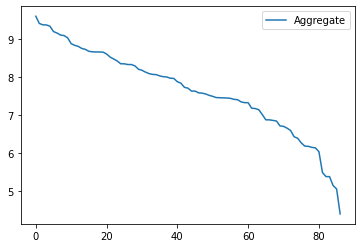

In [40]:
#print(answer1)
# data.reset_index(inplace=True) another way to reset index starting from 0 
answer2 = answer1.set_index([pd.Index(range(88))]) # now we created a new dataframe which is sorted and indexed coorectly so plot will given the variation which is the expected one -_-
answer2.plot(y = 'Aggregate' , use_index = True) # plot without changing order of index correctly !!
# answer2.plot(y='Aggregate' , use_index = True , kind = 'scatter') # ** scatter doesn't work on indices 
answer2.keys()

# creating a csv file for the same : 
# import csv 
# with open('ranked data.csv','w') as file :
#     writer  = csv.DictWriter(file,fieldnames = answer2.keys())
#     writer.writeheader()
#     writer.writerows(answer)

#OR
answer2.insert(0,"Rank",[i for i in range(1,89)],True)
answer2.set_index('Rank', inplace=True)
print(answer2)
answer2.to_csv('ranked_data_SEM_7.csv')

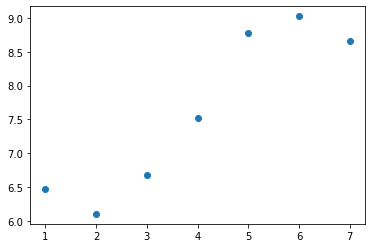

[6.4670454545454525, 6.100568181818184, 6.673295454545454, 7.522386363636364, 8.777045454545451, 9.02715909090909, 8.667011494252879]


In [41]:
# plotting the mean variation in gpa of the batch : 
import matplotlib.pyplot as plt
answer['Sem-1'].mean() # caluclates mean of column 
aver = [answer['Sem-1'].mean(), answer['Sem-2'].mean(), answer['Sem-3'].mean(), answer["Sem-4"].mean(), answer['Sem-5'].mean(), answer['Sem-6'].mean(), answer['Sem-7'].mean()]
plt.plot([1,2,3,4,5,6,7],aver,'o',label = "Average gpa") # plot showing how cgpa varied with each semester number
plt.show()  
print(aver)

In [42]:
def ranker():
    # performance curve for student depending on their roll number or rank : 
    x = input("Enter Name or Roll number(2K18/XX/0XX) : ")
    x = x.upper()
    answer2['Rank'] = range(1,89)
    answer2.set_index('Rank',inplace=True) # method to change index according to some other column
    data = None
    if x[0] == '2':
        data = answer2[answer2['Roll No.'] == x]
    else:
        data = answer2[answer2['Name'] == x]
    #rank = data.index.item() extracting index of this row to get it's rank  if we didn't use rank as index in answer2
    print(data)
    # plotting the data : 
    points = [data['Sem-1'],data['Sem-2'],data['Sem-3'],data['Sem-4'],data['Sem-5'],data['Sem-6'], data['Sem-7']]
    data.reset_index(inplace = True)
    plt.plot([1,2,3,4,5,6,7],points)
    #print((points))
    plt.grid('on')
    plt.show()

Enter Name or Roll number(2K18/XX/0XX) : SHAURYA GUPTA
               Name     Roll No.  Sem-7  Sem-6  Sem-5  Sem-4  Sem-3  Sem-2  \
Rank                                                                         
3     SHAURYA GUPTA  2K18/EP/078   9.64   9.83   9.55   9.82   9.64    8.1   

      Sem-1  Aggregate  
Rank                    
3       8.8   9.366821  


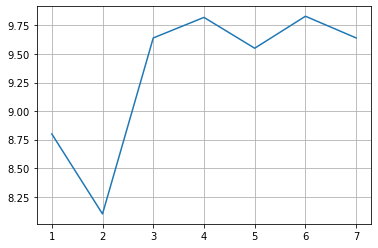

In [43]:
ranker()